In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import string, re,nltk 
nltk.download('punkt')
data = pd.read_csv("/content/drive/MyDrive/IMBD/IMDB Dataset.csv")
data = pd.DataFrame(data)
# data['review'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['review'].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.porter import PorterStemmer

def pre_processing(data_pre,data_length):

  porter_stemmer = PorterStemmer() # for finding the root of the word


  all_stopwords = stopwords.words('english') # for stop word removing
  all_stopwords.append("'ll")
  all_stopwords.append("Oz")
  all_stopwords.append("OZ")

  remove_html = re.compile('<.*?>')

  remove_punc = string.punctuation
  remove_punc = remove_punc.replace(".", "")
  remove_punc = remove_punc.replace("-", "")
  remove_punc = remove_punc.replace("'", "")


  for i in range(data_length): # going through the each data

    data_pre[i] = re.sub(remove_html,'',data_pre[i]) # for removing the HTML tags 

    pattern = r"[{}]".format(re.escape(remove_punc)) # for removing puntuations
    data_pre[i] = re.sub(pattern, "", data_pre[i])

    data_pre[i] = word_tokenize(str(data_pre[i]))
    data_pre[i] = [word for word in data_pre[i] if not word in all_stopwords] # for removing stopwords
    data_pre[i] = (" ").join(data_pre[i])

    # First Word tokenization
    nltk_tokens = nltk.word_tokenize(str(data_pre[i]))

    nltk_stems = []
    # Next find the roots of the word
    for w in nltk_tokens:
      nltk_stems.append(porter_stemmer.stem(w))

    data_pre[i] = (" ").join(nltk_stems)

  return data_pre

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['review'] = pre_processing(data['review'],len(data)) # preprocess the data

In [ ]:
data['review'].drop_duplicates(inplace = True) # if there any duplicate raws those are removed

In [ ]:
data.isnull().sum() # finding weather there are null values

review       0
sentiment    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['sentiment']) # count of each classes
plt.grid()

In [ ]:
from sklearn.preprocessing import LabelEncoder

sentences=data['review']
label_encode=LabelEncoder()
data['sentiment']= label_encode.fit_transform(data['sentiment']) # converting two class as numerical values

(-0.5, 799.5, 799.5, -0.5)

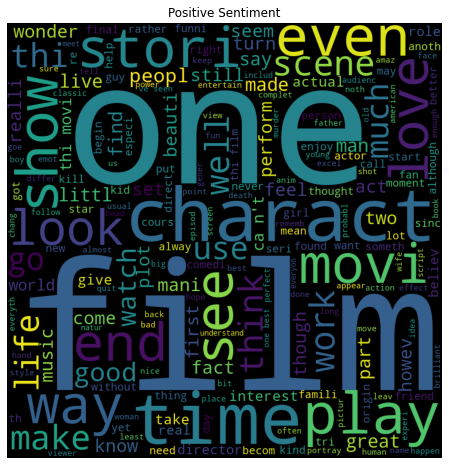

In [ ]:
# for getting the most frequent wors of the data set
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS) 

pos=' '.join(map(str,sentences[data['sentiment']==1]))
neg=' '.join(map(str,sentences[data['sentiment']==0]))
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) # most frequent words in positive sentiment

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

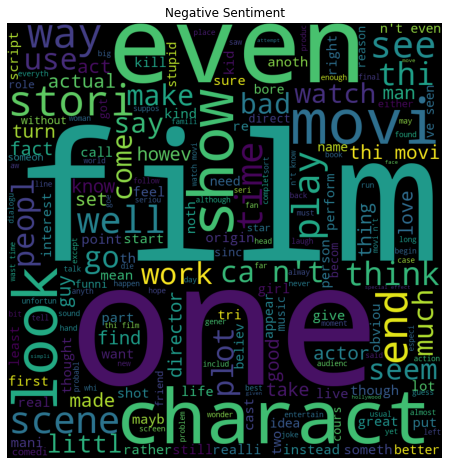

In [ ]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) # most frequent words in negative sentiment

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show() 

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 10000) # limit the number of words to 10,000 so as to minimize the computational power to fix the LSTM input layer size 
tokenizer.fit_on_texts(data['review']) # get those most frequent words of each sentiment

In [ ]:
data['review'][0]

"one review mention watch 1 episod hook . they right exactli happen me.th first thing struck brutal unflinch scene violenc set right word GO . trust show faint heart timid . thi show pull punch regard drug sex violenc . it hardcor classic use word.it call nicknam given oswald maximum secur state penitentari . It focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda . Em citi home many..aryan muslim gangsta latino christian italian irish ... .so scuffl death stare dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show would n't dare . forget pretti pictur paint mainstream audienc forget charm forget romanc ... n't mess around . the first episod I ever saw struck nasti surreal I could n't say I readi I watch I develop tast got accustom high level graphic violenc . not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill priso

In [ ]:
data['sentiment'][0]

1

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(data['review'],data['sentiment'],test_size = 0.2, random_state = 42) # data split to training and test set

y_test_sn = y_test # keep non catogorical data to plot confusion matrix

y_train = to_categorical(y_train,num_classes=2) # convert to categorical form
y_test = to_categorical(y_test,num_classes=2) # convert to categorical form

In [ ]:
# given the dictionay number for each word from the unique 10,000 words
from tensorflow.python.keras.preprocessing.text import Tokenizer

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [ ]:
# find-out the optimum number of word tokens to represent the data set for the neural network architecture
import numpy as np

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

317

In [ ]:
np.sum(num_tokens < max_tokens) / len(num_tokens) # tokens are selected so that the it covers almost 95 percent of the full data set

0.94496

In [ ]:
# import zero padding those 
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

#data is adjusted according to the number of tokens specified
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [ ]:
x_train_pad.shape

(40000, 317)

In [ ]:
# get back the tokenized words to a sentence
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [ ]:
print(return_to_sentence(x_train_pad[0]))

that 's i kept ask mani fight scream match swear gener mayhem permeat 84 minut the comparison also stand think one dimension charact littl depth virtual imposs care happen they badli written cypher director hang belief topic done much better drama tv cinema i must confess i 'm realli one spot bad perform film must said nichola heroin 's slutti best friend nasti bulli brother absolut terribl i n't know act school graduat i i 'd appli full refund post onli lead role manag impress cast so cal british talent probabl never hear at least 's hope next time hire differ scout anoth intrigu thought hideous fashion soundtrack featur like snow patrol ian brown now i 'm bit music fan i 'm familiar artist output i n't recognis track movi apart run b side anyon we get mani mani music montag telegraph 're suppos feel these accompani origin imag coupl kiss lake thi problem none song convey mood effici realis director lack abil carri emot journey audienc storytel dialogu alone th end presum meant desser

In [ ]:
print(x_train_pad[0]) # for demonstrating the encorded first sentiment

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  137    2    1  778  417   53  299  920
  779 2408  290 4251 7608 9853  117    5 1560   34  426   37    7 1859
   16   65 1001 1747 1106  281  125  139  945  382 7529   85 1259 1773
 1960  166   26   68  394  181  392    1  144 2313    1   86   21    7
 1023   30   74    4  144  262 4079 1481    2 9062   62  148 1485 2849
  390  326  319    1    6   43   38  324 2923    1    1  237 2611  346
 7803  937 1033  198   99  399  431   90  143 2224  689  348  185   61
  589  355  163    2  212  349   10 1387  177 5666   92 1063  109 8357
 1056 

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from keras.optimizers import Adam
from keras.layers import Dropout

model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=10000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer')) # adding embedded later for dense vector representation

model.add(LSTM(units=16, return_sequences=True)) # 16 LSTM cells with access the hidden state output
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True)) # 8 LSTM cells access the hidden state output
model.add(Dropout(0.1))

model.add(LSTM(units=4)) # 4 LSTM cells
model.add(Dropout(0.1))

model.add(Dense(2, activation='softmax')) # two dense neuron to two classes with activation softmax

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy']) # build the model with 0.001 learning rate

model.summary() # get the model summery

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 317, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 317, 16)           4288      
_________________________________________________________________
dropout (Dropout)            (None, 317, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 317, 8)            800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 317, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [ ]:
history = model.fit(x_train_pad, y_train, validation_split=0.3, epochs=10, batch_size=1000, shuffle=True, verbose = 1) # train the model

Epoch 1/10
28/28 [==============================] - 43s 1s/step - loss: 0.6908 - accuracy: 0.5674 - val_loss: 0.6627 - val_accuracy: 0.7564
Epoch 2/10
28/28 [==============================] - 36s 1s/step - loss: 0.6279 - accuracy: 0.7978 - val_loss: 0.5739 - val_accuracy: 0.8167
Epoch 3/10
28/28 [==============================] - 36s 1s/step - loss: 0.5495 - accuracy: 0.8590 - val_loss: 0.5174 - val_accuracy: 0.8610
Epoch 4/10
28/28 [==============================] - 36s 1s/step - loss: 0.4894 - accuracy: 0.8988 - val_loss: 0.4846 - val_accuracy: 0.8633
Epoch 5/10
28/28 [==============================] - 36s 1s/step - loss: 0.4426 - accuracy: 0.9182 - val_loss: 0.4554 - val_accuracy: 0.8647
Epoch 6/10
28/28 [==============================] - 36s 1s/step - loss: 0.3983 - accuracy: 0.9310 - val_loss: 0.4308 - val_accuracy: 0.8631
Epoch 7/10
28/28 [==============================] - 36s 1s/step - loss: 0.3591 - accuracy: 0.9359 - val_loss: 0.4065 - val_accuracy: 0.8653
Epoch 8/10
28/28 [==

In [ ]:
result = model.evaluate(x_test_pad, y_test) # evaluate the model with testing data

313/313 [==============================] - 75s 236ms/step - loss: 0.3713 - accuracy: 0.8664


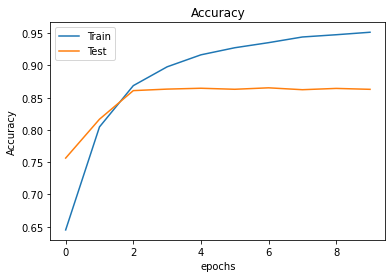

In [ ]:
# plot the accuracy of the model

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

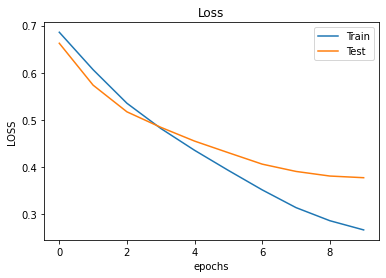

In [ ]:
# plot the loss of the model
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("LOSS")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
# for plotting the confussion matrix

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

label_predict = model.predict(x_test_pad)
label_predict_argmax = np.argmax(label_predict, axis=-1)

y_test_sn = np.array(y_test_sn)

cm = confusion_matrix(y_true=y_test_sn, y_pred=label_predict_argmax)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4358  603]
 [ 733 4306]]


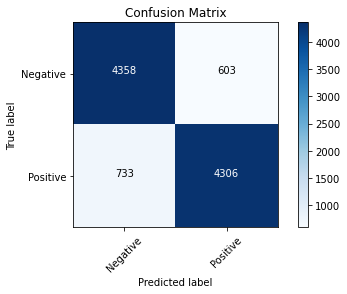

In [ ]:
cm_plot_labels = ['Negative','Positive'] # two class labels
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix') # plot the confusion matrix for training data

In [ ]:
# same pre-processing part for the own written movie comments
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.porter import PorterStemmer

def pre_processing(data_pre,data_length):
  # print(data_pre[0])

  porter_stemmer = PorterStemmer()


  all_stopwords = stopwords.words('english')
  all_stopwords.append("'ll")
  all_stopwords.append("Oz")
  all_stopwords.append("OZ")

  remove_html = re.compile('<.*?>')

  remove_punc = string.punctuation
  remove_punc = remove_punc.replace(".", "")
  remove_punc = remove_punc.replace("-", "")
  remove_punc = remove_punc.replace("'", "")


  for i in range(data_length): 
    data_pre[i] = re.sub(remove_html,'',data_pre[i]) 

    pattern = r"[{}]".format(re.escape(remove_punc))
    data_pre[i] = re.sub(pattern, "", data_pre[i])

    data_pre[i] = word_tokenize(str(data_pre[i]))
    data_pre[i] = [word for word in data_pre[i] if not word in all_stopwords]
    data_pre[i] = (" ").join(data_pre[i])

      # First Word tokenization
    nltk_tokens = nltk.word_tokenize(str(data_pre[i]))

    nltk_stems = []
    # Next find the roots of the word
    for w in nltk_tokens:
      nltk_stems.append(porter_stemmer.stem(w))

    data_pre[i] = (" ").join(nltk_stems)

  return data_pre

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

column_names = ['review', 'sentiment']
row_names    = ['0','1', '2', '3', '4']

# my written reviews
my_review = [["It’s taken a long time getting here from across the Pond, but some things are worth waiting for. A wonderful, witty and weird spin on an old favourite, which seems destined to become a classic itself." , "positive"],
             ["A profound, detail-perfect and soulful slice of American family life, with some of the year’s most sincere performances to date. fantastic and a very good film", "positive"],
             ["Love And Monsters is a blast, an unassuming, immensely winning monster movie filled with great lo-fi creatures and a likeable cast. As a template for making a leaner, less bloated summer movie, Hollywood could do a lot worse." , "positive"],
             ["Wasting big-name actors, The Mauritanian is simultaneously over-stuffed and under-powered, turning a horrifying real-life ordeal into something flat and formulaic. A bad movie. Only Tahar Rahim’s consummate portrayal of grace under duress stands out." , "negative"],
             ["Wrong Turn has some decent booby-trap business but can’t find enough that is different to enliven the weary concept. But for the horror hardcore, keep watching once the credits roll. Soo bad film." , "negative"]]

df = pd.DataFrame(my_review, columns=column_names, index=row_names)

df['review'] = pre_processing(df['review'],len(df))

my_sentences=df['review']
label_encode=LabelEncoder()
df['sentiment']= label_encode.fit_transform(df['sentiment'])

stopwords = set(STOPWORDS) 

my_pos=' '.join(map(str,my_sentences[df['sentiment']==1]))
my_neg=' '.join(map(str,my_sentences[df['sentiment']==0]))

(-0.5, 799.5, 799.5, -0.5)

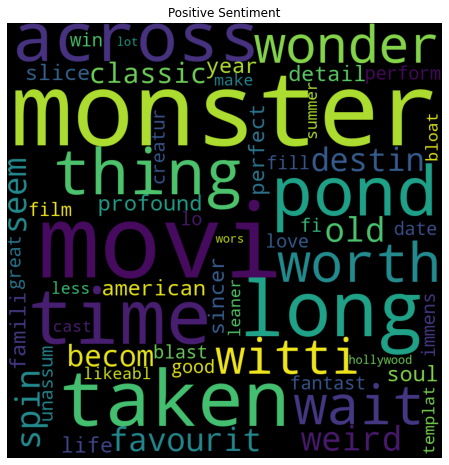

In [ ]:
# my review word frequency on positive sentiment

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(my_pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

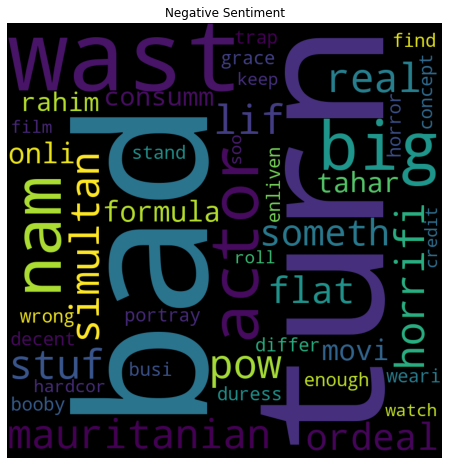

In [ ]:
# my review word frequency on negative sentiment

plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(my_neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show() 

In [ ]:
# same preprocessing for my own written reviews

from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

my_tokenizer = Tokenizer(num_words = 10000)
my_tokenizer.fit_on_texts(df['review'])


x_my_test_tokens = my_tokenizer.texts_to_sequences(df['review'])

#data is adjusted according to the number of tokens specified
x_my_test_pad = pad_sequences(x_my_test_tokens, maxlen=max_tokens)

my_label_predict = model.predict(x_my_test_pad)

my_label_predict_argmax = np.argmax(my_label_predict, axis=-1)

y_test_my = np.array(df['sentiment'][:])

my_cm = confusion_matrix(y_true=y_test_my, y_pred=my_label_predict_argmax)

Confusion matrix, without normalization
[[1 1]
 [1 2]]


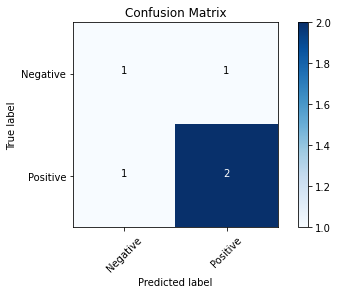

In [ ]:
cm_plot_labels = ['Negative','Positive']
plot_confusion_matrix(cm=my_cm, classes=cm_plot_labels, title='Confusion Matrix')